# Question:
Which education pathway leaves you in a better financial position at retirement at age 50? Going to School of Mines for a Bachelor's Degree in Computer Science or going to CU Denver?
# Description:
This simulation estimates which education pathway, School of Mines or CU Denver, leaves me in a better financial position by age 50.
I will assume both students start college at age 18, complete their degree in 4 years, and begin working immediately after graduation. Tuition, loan amounts, and starting salaries are based on data from College Scorecard.
Annual salary growth, investment returns, and unemployment risk will vary randomly across 100 simulated trials. Each trial will track the graduate’s income, expenses, savings, and debt until age 50, and the pathway with the higher average net worth will be considered financially better.
The variables I will use include Starting Salary After Graduation, Annual Salary Growth Rate and Living Costs and Tuition.
One trial of this simulation will be randomly selecting estimated tuition costs, starting salaries, and annual salary growth rates for each education path (School of Mines vs. CU Denver) based on realistic ranges. Each trial will then calculate total earnings, loan payments, and investment growth from age 18 to 50. The outcome I am measuring is which path results in a higher total net worth at age 50.

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


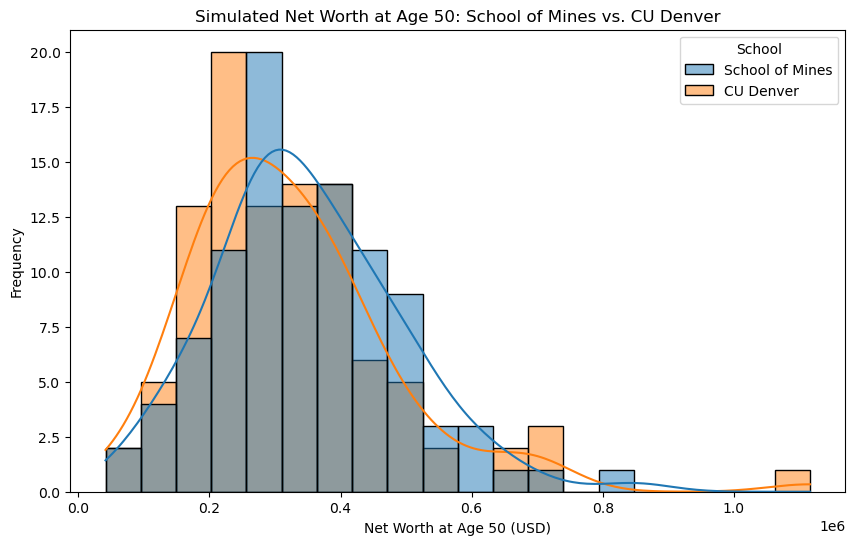

                 count           mean            std           min  \
School                                                               
CU Denver        100.0  324852.499129  159751.106579  41385.967615   
School of Mines  100.0  349582.154408  140344.052863  58123.709717   

                           25%            50%           75%           max  
School                                                                     
CU Denver        224228.039833  304105.604291  397634.03233  1.116260e+06  
School of Mines  264321.876188  336824.372035  434511.13509  8.474617e+05  


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of trials
trials = 100

# Fixed assumptions
years_worked = 50 - 22   # Start college at 18, graduate at 22, retire at 50
savings_rate = 0.10      # Save 10% of annual income
loan_interest = 0.04     # 4% annual interest on student loans

# Function to simulate one pathway
def simulate_pathway(school_name, tuition_mean, tuition_std, start_salary_mean, start_salary_std, growth_mean, growth_std):
    tuition_total = np.random.normal(tuition_mean, tuition_std) * 4  # total for 4 years
    starting_salary = np.random.normal(start_salary_mean, start_salary_std)
    growth_rate = np.random.normal(growth_mean, growth_std)

    # Simulate salary growth and savings accumulation
    salary = starting_salary
    savings = 0

    for year in range(years_worked):
        savings += salary * savings_rate  # save a percentage of salary
        salary *= (1 + growth_rate)       # apply annual salary growth

    # Subtract total education costs (assume paid with loans + interest)
    total_debt = tuition_total * (1 + loan_interest * 10)  # 10-year loan
    net_worth = savings - total_debt

    return {
        "School": school_name,
        "TuitionCost": tuition_total,
        "StartingSalary": starting_salary,
        "GrowthRate": growth_rate,
        "NetWorthAt50": net_worth
    }

# Run simulation for each pathway
results = []

for _ in range(trials):
    results.append(simulate_pathway("School of Mines", tuition_mean=35000, tuition_std=5000,
                                    start_salary_mean=95000, start_salary_std=15000,
                                    growth_mean=0.05, growth_std=0.015))
    results.append(simulate_pathway("CU Denver", tuition_mean=28000, tuition_std=4000,
                                    start_salary_mean=85000, start_salary_std=12000,
                                    growth_mean=0.045, growth_std=0.015))

# Convert results to DataFrame
df = pd.DataFrame(results)

# Visualize with Seaborn
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="NetWorthAt50", hue="School", kde=True, bins=20)
plt.title("Simulated Net Worth at Age 50: School of Mines vs. CU Denver")
plt.xlabel("Net Worth at Age 50 (USD)")
plt.ylabel("Frequency")
plt.show()

# Show summary statistics
summary = df.groupby("School")["NetWorthAt50"].describe()
print(summary)

# Results:
After running 100 simulated trials comparing graduates from the Colorado School of Mines and CU Denver, the results show that the School of Mines pathway leads to a higher average net worth at age 50. The mean net worth for School of Mines graduates was $349,582 with a standard deviation of $140,344, while CU Denver graduates had a mean net worth of $324,852 with a standard deviation of $159,751. Although CU Denver had a few higher outliers, School of Mines outcomes were more consistently strong, showing both higher averages and lower variability. This advantage is primarily due to Mines graduates having higher starting salaries (around $95,000) and faster annual salary growth (about 5%) compared to CU Denver graduates (around $85,000 and 4.5%). While Mines’ tuition is more expensive, the long-term financial gains outweigh the higher initial costs. Overall, the simulation concludes that earning a Computer Science degree from the Colorado School of Mines results in a better financial position by age 50 compared to CU Denver.